# Geospatial mapping of the ESS Immigrant data

Install **geopandas, plotly and country_converter**. 


```Python
pip install geopandas #support for geographic data to pandas objects.
pip install plotly #enables to make publication-quality graphs
pip install country_converter--upgrade #country code converter 


In [3]:
#Load all the important packages
import geopandas 
import numpy as np
import pandas as pd
import country_converter as coco
import plotly.express as px

import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

from collections import OrderedDict
cmaps = OrderedDict()

You can download geospatial data from __[here](https://geojson-maps.ash.ms/)__. The page allows you to customize your own geospatial map with the regions you want. 

In [4]:
country = geopandas.read_file("Desktop/Python/custom.geo.json")
country.head()

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry
0,1,Admin-0 country,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,...,Europe,Southern Europe,Europe & Central Asia,7,7,4,-99,1,ALB.geojson,"POLYGON ((20.59025 41.85540, 20.46318 41.51509..."
1,1,Admin-0 country,4,Austria,AUT,0,2,Sovereign country,Austria,AUT,...,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,AUT.geojson,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
2,1,Admin-0 country,2,Belgium,BEL,0,2,Sovereign country,Belgium,BEL,...,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,BEL.geojson,"POLYGON ((3.31497 51.34578, 4.04707 51.26726, ..."
3,1,Admin-0 country,4,Bulgaria,BGR,0,2,Sovereign country,Bulgaria,BGR,...,Europe,Eastern Europe,Europe & Central Asia,8,8,5,-99,1,BGR.geojson,"POLYGON ((22.65715 44.23492, 22.94483 43.82379..."
4,1,Admin-0 country,5,Bosnia and Herzegovina,BIH,0,2,Sovereign country,Bosnia and Herzegovina,BIH,...,Europe,Southern Europe,Europe & Central Asia,16,22,4,-99,1,BIH.geojson,"POLYGON ((19.00549 44.86023, 19.36803 44.86300..."


(30.0, 90.0)

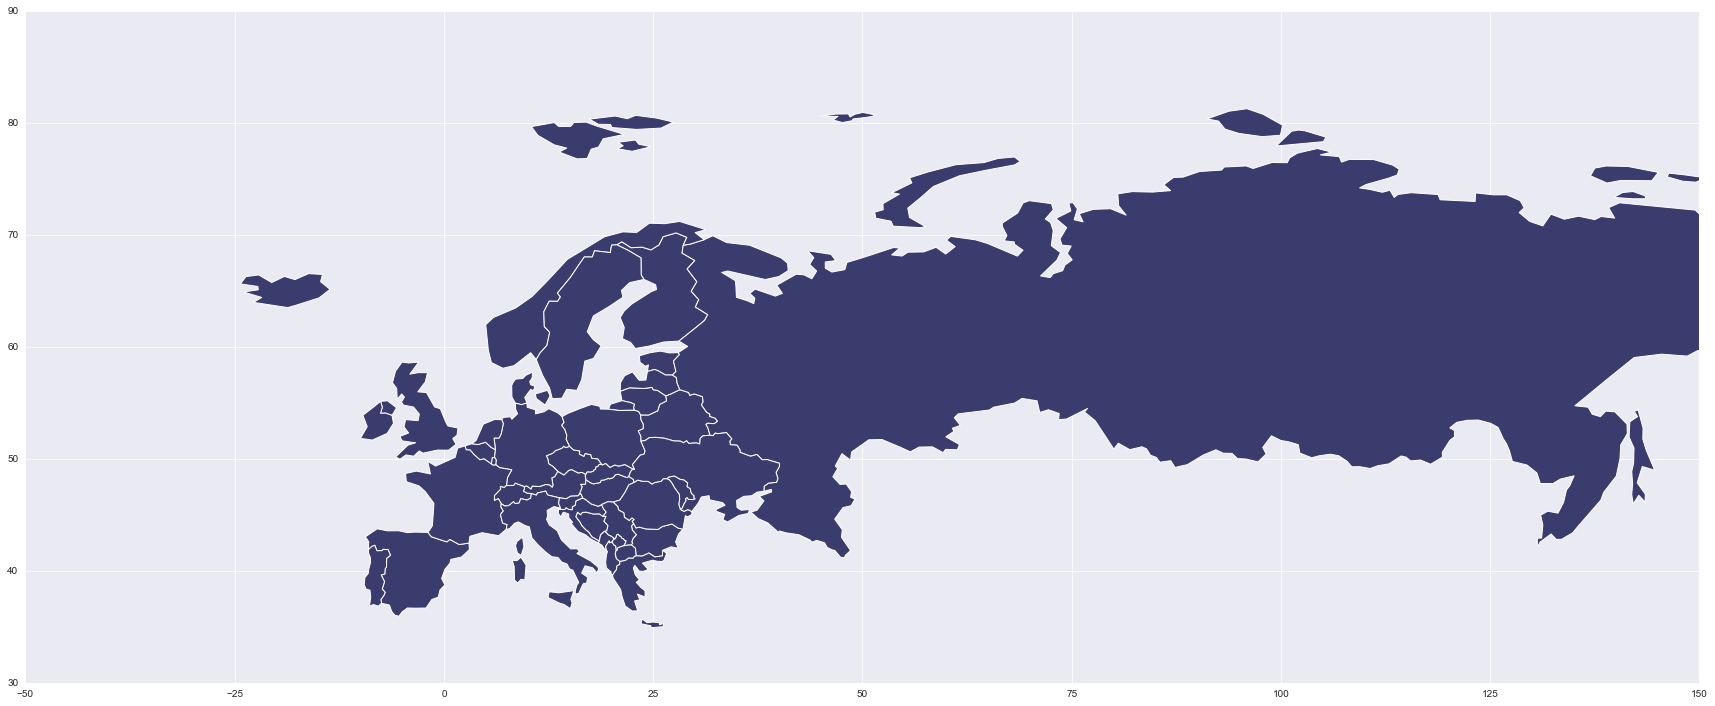

In [6]:
ax=country.plot(figsize=(30,20), color='#3B3C6E')
ax.set_xlim(-50,150)
ax.set_ylim(30,90)

### European Social Survey 
The European Social Survey (ESS) is an academically driven cross-national survey that has been conducted across Europe since its establishment in 2001. Every two years, face-to-face interviews are conducted with newly selected, cross-sectional samples.

The survey measures the attitudes, beliefs and behaviour patterns of diverse populations in more than thirty nations. 

In [5]:
data=pd.read_csv("Desktop/Python/ESS1-9e01_1 (1)/ESS1-9e01_1.csv") 
data.head()

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (14,15,16,17,19,20,21,22,27,28,29,30,32,33,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,cntry,cname,cedition,cproddat,cseqno,name,essround,edition,idno,dweight,...,noimbro,pplstrd,qfimchr,qfimcmt,qfimedu,qfimlng,qfimwht,qfimwsk,rfgbfml,rfgfrpc
0,AT,ESS1-9e01,1.0,10.12.2020,1,ESS1e06_6,1,6.6,1,0.9452,...,28.0,2.0,4.0,10.0,10.0,10.0,1.0,10.0,2.0,4.0
1,AT,ESS1-9e01,1.0,10.12.2020,2,ESS1e06_6,1,6.6,2,0.4726,...,4.0,2.0,0.0,10.0,8.0,8.0,0.0,10.0,1.0,2.0
2,AT,ESS1-9e01,1.0,10.12.2020,3,ESS1e06_6,1,6.6,3,0.9452,...,70.0,2.0,6.0,10.0,6.0,10.0,0.0,8.0,2.0,4.0
3,AT,ESS1-9e01,1.0,10.12.2020,4,ESS1e06_6,1,6.6,4,0.9452,...,2.0,4.0,0.0,6.0,2.0,4.0,0.0,3.0,1.0,4.0
4,AT,ESS1-9e01,1.0,10.12.2020,5,ESS1e06_6,1,6.6,6,1.8905,...,5.0,4.0,1.0,88.0,5.0,7.0,0.0,88.0,2.0,3.0


The ESS uses ISO 2 country codes while the geojson data uses ISO 3 country codes. To be able to merge both databases we generate a new collumn for the ess data with the convertion of ISO2 to ISO3. 

In [7]:
#Creating a new collumn with adm0_a3 
data['adm0_a3']=coco.convert(names=data['cntry'], to='ISO3')

In [193]:
data_imtcjob = (data.groupby('adm0_a3')['imtcjob'].value_counts(normalize=True)*100).unstack()
data_imtcjob['mean'] = data_imtcjob.mean(axis=1)
data_iso3 = pd.DataFrame(data_imtcjob,columns=['mean'])
data_iso3.reset_index(level=0, inplace=True)
country1= country.merge(data_iso3, on='adm0_a3')
country1

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry,mean
0,1,Admin-0 country,4,Austria,AUT,0,2,Sovereign country,Austria,AUT,...,Western Europe,Europe & Central Asia,7,7,5,-99,1,AUT.geojson,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",8.333333
1,1,Admin-0 country,2,Belgium,BEL,0,2,Sovereign country,Belgium,BEL,...,Western Europe,Europe & Central Asia,7,7,5,-99,1,BEL.geojson,"POLYGON ((3.31497 51.34578, 4.04707 51.26726, ...",7.692308
2,1,Admin-0 country,4,Switzerland,CHE,0,2,Sovereign country,Switzerland,CHE,...,Western Europe,Europe & Central Asia,11,11,6,-99,1,CHE.geojson,"POLYGON ((9.59423 47.52506, 9.63293 47.34760, ...",8.333333
3,1,Admin-0 country,5,Czech Republic,CZE,0,2,Sovereign country,Czech Republic,CZE,...,Eastern Europe,Europe & Central Asia,10,14,8,-99,1,CZE.geojson,"POLYGON ((16.96029 48.59698, 16.49928 48.78581...",7.692308
4,1,Admin-0 country,4,Denmark,DN1,1,2,Country,Denmark,DNK,...,Northern Europe,Europe & Central Asia,7,7,4,-99,1,DNK.geojson,"MULTIPOLYGON (((12.69001 55.60999, 12.08999 54...",7.692308
5,1,Admin-0 country,2,Germany,DEU,0,2,Sovereign country,Germany,DEU,...,Western Europe,Europe & Central Asia,7,7,4,-99,1,DEU.geojson,"POLYGON ((9.92191 54.98310, 9.93958 54.59664, ...",7.692308
6,1,Admin-0 country,2,Spain,ESP,0,2,Sovereign country,Spain,ESP,...,Southern Europe,Europe & Central Asia,5,5,3,-99,1,ESP.geojson,"POLYGON ((-9.03482 41.88057, -8.98443 42.59278...",7.142857
7,1,Admin-0 country,6,Estonia,EST,0,2,Sovereign country,Estonia,EST,...,Northern Europe,Europe & Central Asia,7,7,4,-99,1,EST.geojson,"POLYGON ((24.31286 57.79342, 24.42893 58.38341...",8.333333
8,1,Admin-0 country,3,Finland,FI1,1,2,Country,Finland,FIN,...,Northern Europe,Europe & Central Asia,7,7,4,-99,1,FIN.geojson,"POLYGON ((28.59193 69.06478, 28.44594 68.36461...",7.142857
9,1,Admin-0 country,2,France,FR1,1,2,Country,France,FRA,...,Western Europe,Europe & Central Asia,6,6,3,-99,1,FRA.geojson,"MULTIPOLYGON (((-52.55642 2.50471, -52.93966 2...",7.692308


Text(0.5, 1.0, 'Perception of European countries on wheter immigrants create jobs')

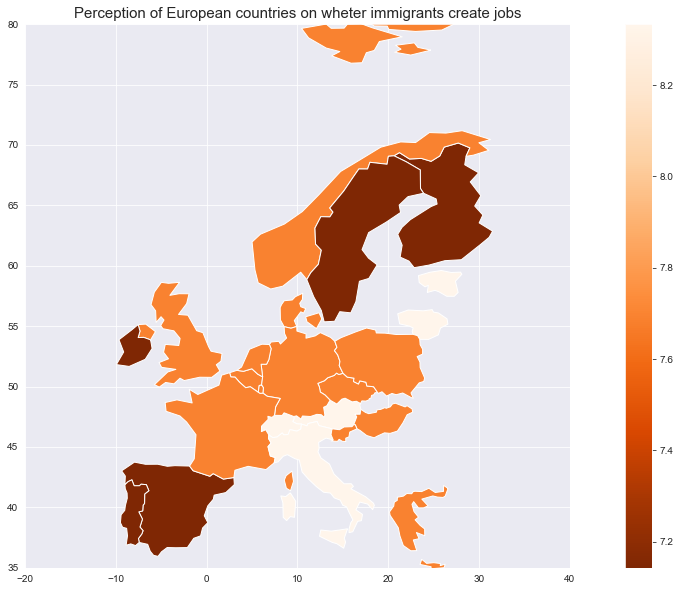

In [251]:
ax=country1.plot(column='mean',figsize=(20,10),legend=True, cmap='Oranges_r')
ax.set_xlim(-20,40)
ax.set_ylim(35,80)
ax.set_title('Perception of European countries on wheter immigrants create jobs',fontsize= 15)